In [30]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [31]:
data = pd.read_csv("heart.csv")

In [32]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
#Look for duplicates
data[data.duplicated()] 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [34]:
#Drop duplicates
data = data.drop_duplicates()

In [35]:
#Show numerical stats
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [36]:
data.sex[data.sex == 1] = "Male"
data.sex[data.sex == 0] = "Female"

In [37]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
#Change field names where applicable so that they are easily understood
data.rename(columns={'cp':'chest_pain',
                     'trtbps':'resting_blood_pressure',
                     'caa':'blood_vessels',
                     'fbs':'fasting_blood_sugar',
                     'thalachh':'max_heart_rate',                     
                     'output':'heart_attack'}, 
            inplace=True)

In [39]:
data.head()

,age,sex,chest_pain,resting_blood_pressure,chol,fasting_blood_sugar,restecg,max_heart_rate,exng,oldpeak,slp,blood_vessels,thall,heart_attack
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1


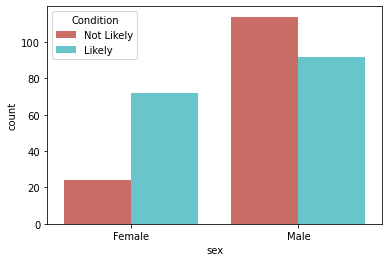

In [40]:
plot = sns.countplot(x="sex", hue='heart_attack', data=data, palette='hls', order=sorted(data.sex.value_counts().index) )
plt.legend(title="Condition", loc="upper left", labels=["Not Likely","Likely"])
plt.show(plot)

<font size="4"><b>Males are more likely to have a heart attack than females.</b></font>

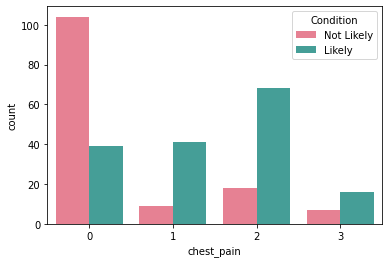

In [42]:
plot2 = sns.countplot(x="chest_pain", hue='heart_attack', data=data, palette='husl', order=sorted(data.chest_pain.value_counts().index) )
plt.legend(title="Condition", loc="upper right", labels=["Not Likely","Likely"])
plt.show(plot2)

<font size="2"><b>Chest pain type 0 is the least likely to be a symptom of heart attack, while chest pain type 2 is the most likely.</font></b> 

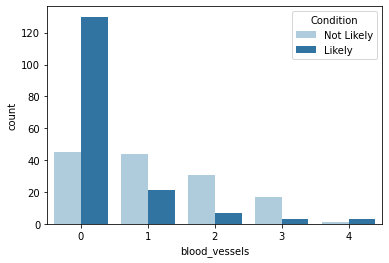

In [43]:
plot3 = sns.countplot(x="blood_vessels", hue='heart_attack', data=data, palette='Paired', order=sorted(data.blood_vessels.value_counts().index) )
plt.legend(title="Condition", loc="upper right", labels=["Not Likely","Likely"])
plt.show(plot3)

<font size="2"><b>Just from looking at the bar chart, there seems to be a correlation between the number of blood vessels and the chance of heart attack, with the likelihood of experiencing heart attack increasing as the number of blood vessels decrease. </font></b>

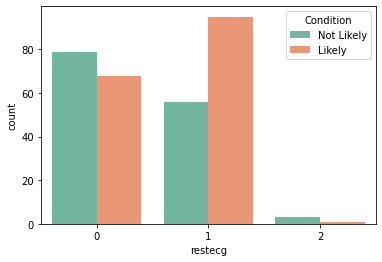

In [48]:
plot4 = sns.countplot(x="restecg", hue='heart_attack', data=data, palette='Set2', order=sorted(data.restecg.value_counts().index) )
plt.legend(title="Condition", loc="upper right", labels=["Not Likely","Likely"])
plt.show(plot4)

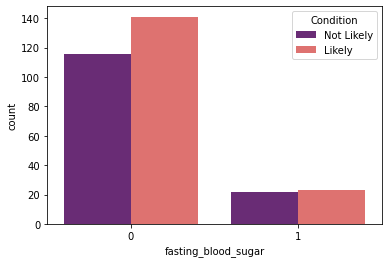

In [53]:
plot5 = sns.countplot(x="fasting_blood_sugar", hue='heart_attack', data=data, palette='magma', order=sorted(data.fasting_blood_sugar.value_counts().index) )
plt.legend(title="Condition", loc="upper right", labels=["Not Likely","Likely"])
plt.show(plot5)

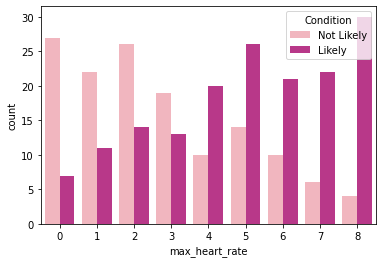

In [57]:
data['max_heart_rate'] = pd.qcut(data['max_heart_rate'], q=np.linspace(0,1,10).tolist(),labels=False)
plot6 = sns.countplot(x="max_heart_rate", hue='heart_attack', data=data, palette='RdPu', order=sorted(data.max_heart_rate.value_counts().index) )
plt.legend(title="Condition", loc="upper right", labels=["Not Likely","Likely"])
plt.show(plot6)

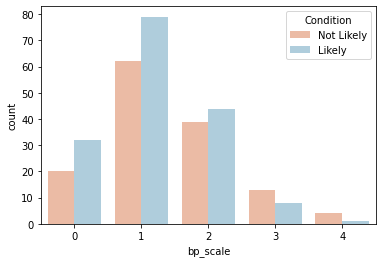

In [63]:
data["bp_scale"] = pd.cut(data['resting_blood_pressure'],bins=5,labels=False)
plot7 = sns.countplot(x='bp_scale', hue="heart_attack", data=data, palette='RdBu', order=sorted(data.bp_scale.value_counts().index))
plt.legend(title='Condition', loc='upper right', labels=['Not Likely', 'Likely'])
plt.show(plot7)

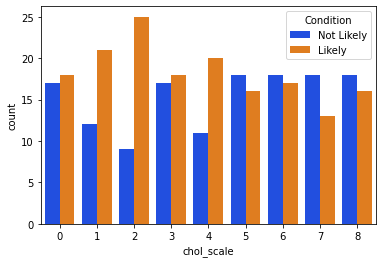

In [70]:
data["chol_scale"] = pd.qcut(data['chol'],q=np.linspace(0,1,10).tolist(),labels=False)
plot8 = sns.countplot(x='chol_scale', hue="heart_attack", data=data, palette='bright', order=sorted(data.chol_scale.value_counts().index))
plt.legend(title='Condition', loc='upper right', labels=['Not Likely', 'Likely'])
plt.show(plot8)

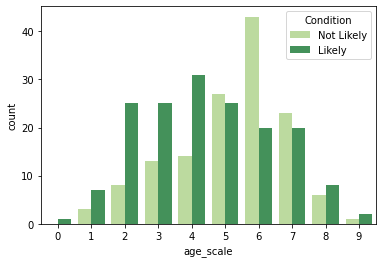

In [78]:
data["age_scale"] = pd.cut(data['age'],bins=10,labels=False)
plot9 = sns.countplot(x='age_scale', hue="heart_attack", data=data, palette='YlGn', order=sorted(data.age_scale.value_counts().index))
plt.legend(title='Condition', loc='upper right', labels=['Not Likely', 'Likely'])
plt.show(plot9)

In [79]:
data.columns #to see newly created features (bp_scale, chol_scale, age_scale)

Index(['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'chol',
       'fasting_blood_sugar', 'restecg', 'max_heart_rate', 'exng', 'oldpeak',
       'slp', 'blood_vessels', 'thall', 'heart_attack', 'bp_scale',
       'chol_scale', 'age_scale'],
      dtype='object')

In [81]:
gd = ["chest_pain","restecg","thall","slp"]
gd_dict = {}

for x in gd:
    gd_dict[x] = x

gd_dummies = pd.get_dummies(data, prefix = gd_dict, columns = gd)
data = pd.concat([data,gd_dummies], axis=1)

In [82]:
data.columns #see newly categorized columns (chest_pain_0, chest_pain_1, chest_pain_2, etc.)

Index(['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'chol',
       'fasting_blood_sugar', 'restecg', 'max_heart_rate', 'exng', 'oldpeak',
       'slp', 'blood_vessels', 'thall', 'heart_attack', 'bp_scale',
       'chol_scale', 'age_scale', 'age', 'sex', 'resting_blood_pressure',
       'chol', 'fasting_blood_sugar', 'max_heart_rate', 'exng', 'oldpeak',
       'blood_vessels', 'heart_attack', 'bp_scale', 'chol_scale', 'age_scale',
       'chest_pain_0', 'chest_pain_1', 'chest_pain_2', 'chest_pain_3',
       'restecg_0', 'restecg_1', 'restecg_2', 'thall_0', 'thall_1', 'thall_2',
       'thall_3', 'slp_0', 'slp_1', 'slp_2'],
      dtype='object')

In [101]:
selected_features = ["age","sex","fasting_blood_sugar","exng","oldpeak","blood_vessels","max_heart_rate",
                    "bp_scale","chol_scale","chest_pain_0","chest_pain_1","chest_pain_2","chest_pain_3",
                    "restecg_0","restecg_1","restecg_2","thall_0","thall_1","thall_2","thall_3",\
                    "slp_0","slp_1","slp_2","heart_attack"]

In [102]:
new_data = data[selected_features]

In [103]:
new_data

,age,age,sex,sex,fasting_blood_sugar,fasting_blood_sugar,exng,exng,oldpeak,oldpeak,...,restecg_2,thall_0,thall_1,thall_2,thall_3,slp_0,slp_1,slp_2,heart_attack,heart_attack
0,63,63,Male,Male,1,1,0,0,2.3,2.3,...,0,0,1,0,0,1,0,0,1,1
1,37,37,Male,Male,0,0,0,0,3.5,3.5,...,0,0,0,1,0,1,0,0,1,1
2,41,41,Female,Female,0,0,0,0,1.4,1.4,...,0,0,0,1,0,0,0,1,1,1
3,56,56,Male,Male,0,0,0,0,0.8,0.8,...,0,0,0,1,0,0,0,1,1,1
4,57,57,Female,Female,0,0,1,1,0.6,0.6,...,0,0,0,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,57,Female,Female,0,0,1,1,0.2,0.2,...,0,0,0,0,1,0,1,0,0,0
299,45,45,Male,Male,0,0,0,0,1.2,1.2,...,0,0,0,0,1,0,1,0,0,0
300,68,68,Male,Male,1,1,0,0,3.4,3.4,...,0,0,0,0,1,0,1,0,0,0
301,57,57,Male,Male,0,0,1,1,1.2,1.2,...,0,0,0,0,1,0,1,0,0,0


In [104]:
#Remove duplicate columns
new_data = new_data.loc[:, ~new_data.columns.duplicated()]

In [105]:
new_data

,age,sex,fasting_blood_sugar,exng,oldpeak,blood_vessels,max_heart_rate,bp_scale,chol_scale,chest_pain_0,...,restecg_1,restecg_2,thall_0,thall_1,thall_2,thall_3,slp_0,slp_1,slp_2,heart_attack
0,63,Male,1,0,2.3,0,3,2,3,0,...,0,0,0,1,0,0,1,0,0,1
1,37,Male,0,0,3.5,0,8,1,5,0,...,1,0,0,0,1,0,1,0,0,1
2,41,Female,0,0,1.4,0,7,1,1,0,...,0,0,0,0,1,0,0,0,1,1
3,56,Male,0,0,0.8,0,8,1,4,0,...,1,0,0,0,1,0,0,0,1,1
4,57,Female,0,1,0.6,0,6,1,8,1,...,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,1,0.2,0,1,2,4,1,...,1,0,0,0,0,1,0,1,0,0
299,45,Male,0,0,1.2,0,2,0,6,0,...,1,0,0,0,0,1,0,1,0,0
300,68,Male,1,0,3.4,2,2,2,0,1,...,1,0,0,0,0,1,0,1,0,0
301,57,Male,0,1,1.2,1,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0


In [115]:
new_data['sex'] = new_data['sex'].replace(['Male'],1)
new_data['sex'] = new_data['sex'].replace(['Female'],0)

In [140]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(new_data, test_size=0.30, shuffle=True, stratify=new_data["heart_attack"])

In [141]:
train_df.shape, test_df.shape

((211, 24), (91, 24))

In [142]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=10, n_jobs=1, verbose=1, class_weight="balanced_subsample")

In [143]:
train_df

,age,sex,fasting_blood_sugar,exng,oldpeak,blood_vessels,max_heart_rate,bp_scale,chol_scale,chest_pain_0,...,restecg_1,restecg_2,thall_0,thall_1,thall_2,thall_3,slp_0,slp_1,slp_2,heart_attack
105,68,0,0,0,1.5,0,0,1,2,0,...,0,0,0,0,1,0,0,1,0,1
32,44,1,0,0,0.0,0,8,1,2,0,...,0,0,0,0,1,0,0,0,1,1
223,56,0,1,1,4.0,2,2,4,7,1,...,0,0,0,0,0,1,1,0,0,0
219,48,1,1,1,0.0,2,3,1,5,1,...,0,0,0,0,0,1,0,0,1,0
299,45,1,0,0,1.2,0,2,0,6,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,63,0,0,1,1.8,2,6,0,6,1,...,1,0,0,0,1,0,0,1,0,0
171,48,1,0,0,1.0,0,6,0,3,0,...,1,0,0,0,0,1,1,0,0,0
109,50,0,0,0,0.0,0,5,0,5,1,...,0,0,0,0,1,0,0,0,1,1
69,62,0,0,0,0.0,0,6,1,2,1,...,1,0,0,0,1,0,0,0,1,1


In [144]:
rf.fit(train_df.drop(columns=["heart_attack"]), train_df["heart_attack"])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       n_estimators=300, n_jobs=1, verbose=1)

In [145]:
test_df["prediction"] = rf.predict_proba(test_df.drop(columns = ["heart_attack"]))[:,1]
test_df["prediction_label"] = np.argmax(rf.predict_proba(test_df.drop(columns = ["heart_attack","prediction"])),axis=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


In [146]:
test_df[["prediction","prediction_label","heart_attack"]]

,prediction,prediction_label,heart_attack
73,0.766667,1,1
151,0.765796,1,1
4,0.662362,1,1
270,0.248946,0,0
288,0.066667,0,0
...,...,...,...
89,0.736667,1,1
85,0.643333,1,1
176,0.156667,0,0
248,0.503333,1,0


In [147]:
from sklearn.metrics import classification_report
print(classification_report(test_df["prediction_label"], test_df["heart_attack"]))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        42
           1       0.86      0.86      0.86        49

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91

